## **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

#supress warnings
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_csv('/content/drive/MyDrive/BangaloreZomatoData.csv')


## **Exploratory Data Analysis**

In [6]:
df.head()

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am – 11pm (Today),"273, Monalisa, 6th Main, 100 Feet Road, Indira...",+919945977774,1,1,1,1,4.0,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...","Economical, Prompt Service, Hygiene, Quality F...",450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,"544, First Floor, CMH Road, Near Indiranagar M...",+918041135050,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, ...","Boneless Chicken Biryani, Ample Seating Area, ...",700
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),"8/ 9, 17th F Cross, 2nd Stage, Indiranagar, Ba...",+918861564169,1,1,1,0,3.9,411,3.5,33200,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambia...",300
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),"308, 2nd Stage, 100 Feet Road, Indiranagar, Ba...",+919916465787,1,1,1,0,2.4,422,4.4,8205,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White...","Value for Money, Packaging, Staff, Ambience, Food",400
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),"38/1A, CMH Road, Indiranagar, Bangalore",+919513700040,1,1,1,0,2.8,673,4.0,9148,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, Vi...",400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              8923 non-null   object
 1   URL               8923 non-null   object
 2   Cuisines          8923 non-null   object
 3   Area              8923 non-null   object
 4   Timing            5820 non-null   object
 5   Full_Address      8923 non-null   object
 6   PhoneNumber       8923 non-null   object
 7   IsHomeDelivery    8923 non-null   int64 
 8   isTakeaway        8923 non-null   int64 
 9   isIndoorSeating   8923 non-null   int64 
 10  isVegOnly         8923 non-null   int64 
 11  Dinner Ratings    8923 non-null   object
 12  Dinner Reviews    8923 non-null   int64 
 13  Delivery Ratings  8923 non-null   object
 14  Delivery Reviews  8923 non-null   int64 
 15  KnownFor          258 non-null    object
 16  PopularDishes     1535 non-null   object
 17  PeopleKnownFor

In [8]:
df.describe()

,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Reviews,Delivery Reviews,AverageCost
count,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000
mean,0.997871,0.660092,0.442676,0.072285,157.106018,2014.709403,340.225261
std,0.046098,0.473704,0.496731,0.258974,731.834227,5524.430542,308.338943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,42.000000,150.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,279.000000,250.000000
75%,1.000000,1.000000,1.000000,0.000000,43.000000,1493.500000,400.000000
max,1.000000,1.000000,1.000000,1.000000,26500.000000,99600.000000,4200.000000


## **Inferences**

The average cost goes from 50 bucks and goes all the way upto 4200 and the average of average cost is 340 bucks.

The reviews are none in some of the cases however the maximum number of reviews is 99,600 for delivery reviews however for dinner (dine-in) reviews there are 26,500 reviews and purely looking at numbers we can either concur that:-

people are getting food delivered more than they dine-in or
the people who dine-in don't leave as much reviews.

In [10]:
np.around(df.corr()[df.corr()>0.0],3)

,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Reviews,Delivery Reviews,AverageCost
IsHomeDelivery,1.000,0.064,0.041,0.013,0.010,0.016,NaN
isTakeaway,0.064,1.000,0.582,0.128,0.126,0.137,0.257
isIndoorSeating,0.041,0.582,1.000,0.109,0.228,0.167,0.516
isVegOnly,0.013,0.128,0.109,1.000,0.007,0.049,NaN
Dinner Reviews,0.010,0.126,0.228,0.007,1.000,0.201,0.470
Delivery Reviews,0.016,0.137,0.167,0.049,0.201,1.000,0.074
AverageCost,NaN,0.257,0.516,NaN,0.470,0.074,1.000


## **Inferences**

The correlation matrix above shows that Average Cost and Indoor seating has a positive correlation which makes sense.

Similarly, it also makes sense that if the restaurant offers Take Away, the average cost will be less.

The average cost and the dinner reviews also has a positive correlation which means reviews are also affecting the average cost.

### **Correlation Matrix**

In [11]:
corr = df.corr()
corr = np.around(corr[corr > 0.0],3)
fig = px.imshow(corr,
                text_auto=True, template='simple_white',
                color_continuous_scale=px.colors.sequential.Viridis,
                aspect="auto")
fig.update_xaxes(side="top")
fig.show()

### **Drop Columns**

In the given dataset, we are removing those columns that may not be so useful for our analysis

In [12]:
df.drop(['URL', 'Full_Address','PhoneNumber'], axis= 1, inplace=True)


In [13]:
df.head()

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Sri Udupi Park,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am – 11pm (Today),1,1,1,1,4.0,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...","Economical, Prompt Service, Hygiene, Quality F...",450
1,Meghana Foods,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, ...","Boneless Chicken Biryani, Ample Seating Area, ...",700
2,Donne Biriyani House,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),1,1,1,0,3.9,411,3.5,33200,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambia...",300
3,Domino's Pizza,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),1,1,1,0,2.4,422,4.4,8205,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White...","Value for Money, Packaging, Staff, Ambience, Food",400
4,KFC,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),1,1,1,0,2.8,673,4.0,9148,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, Vi...",400


In [14]:
df.dtypes

Name                object
Cuisines            object
Area                object
Timing              object
IsHomeDelivery       int64
isTakeaway           int64
isIndoorSeating      int64
isVegOnly            int64
Dinner Ratings      object
Dinner Reviews       int64
Delivery Ratings    object
Delivery Reviews     int64
KnownFor            object
PopularDishes       object
PeopleKnownFor      object
AverageCost          int64
dtype: object

### **Histograms**

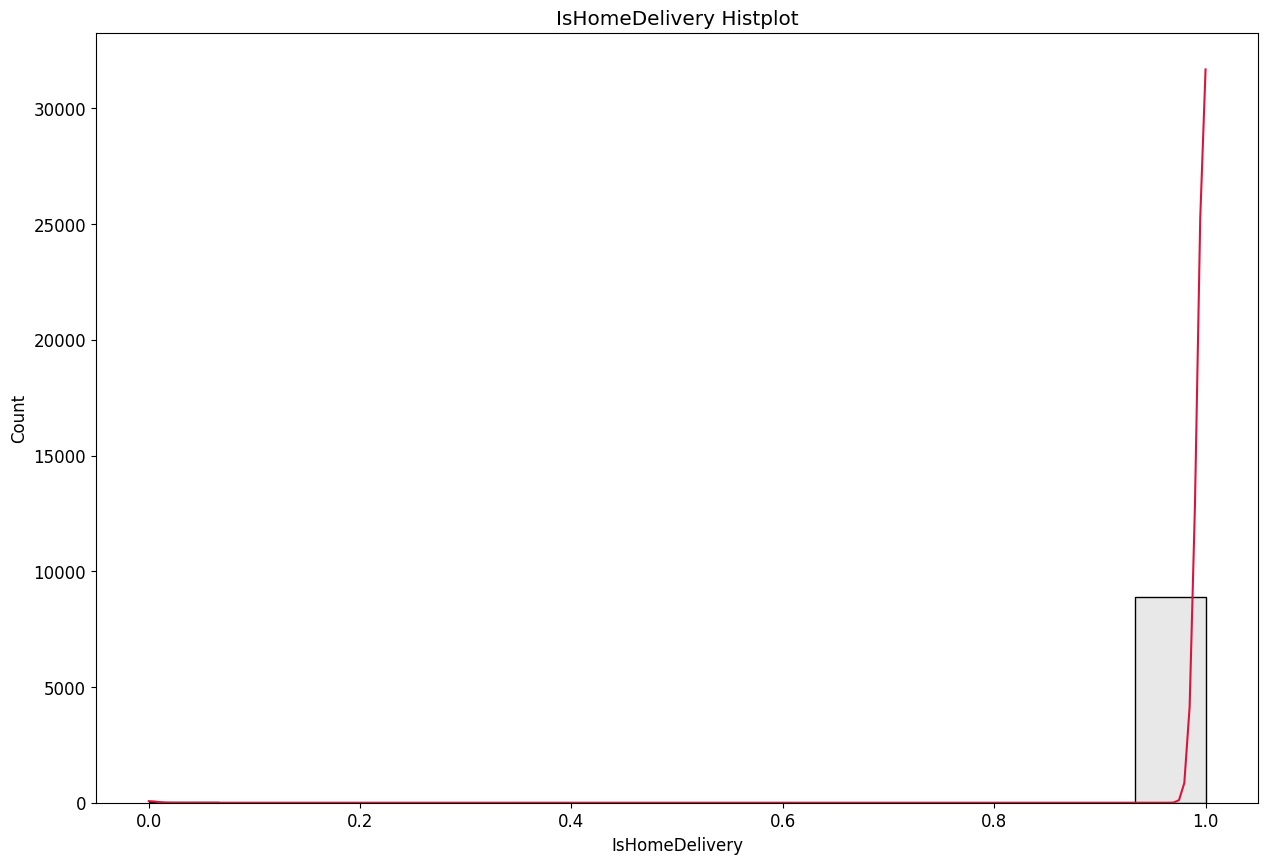

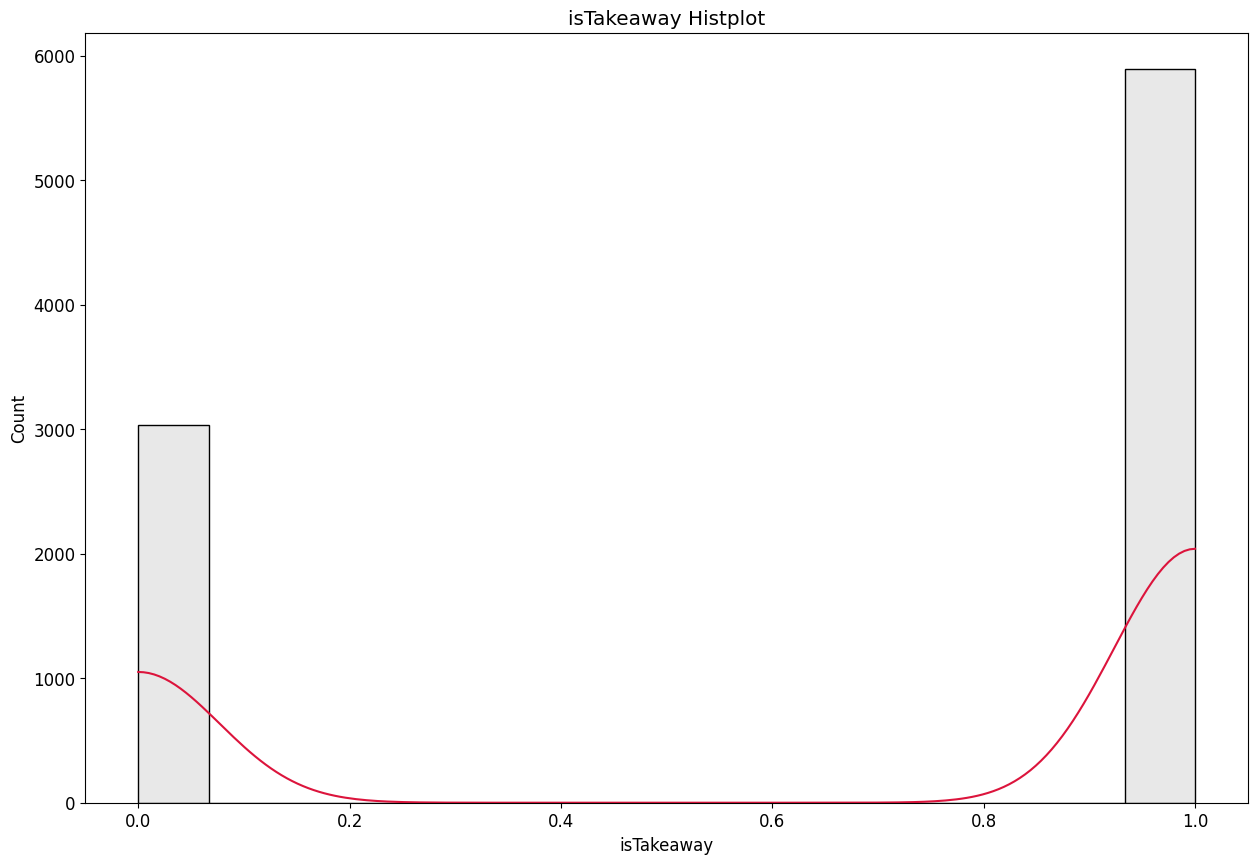

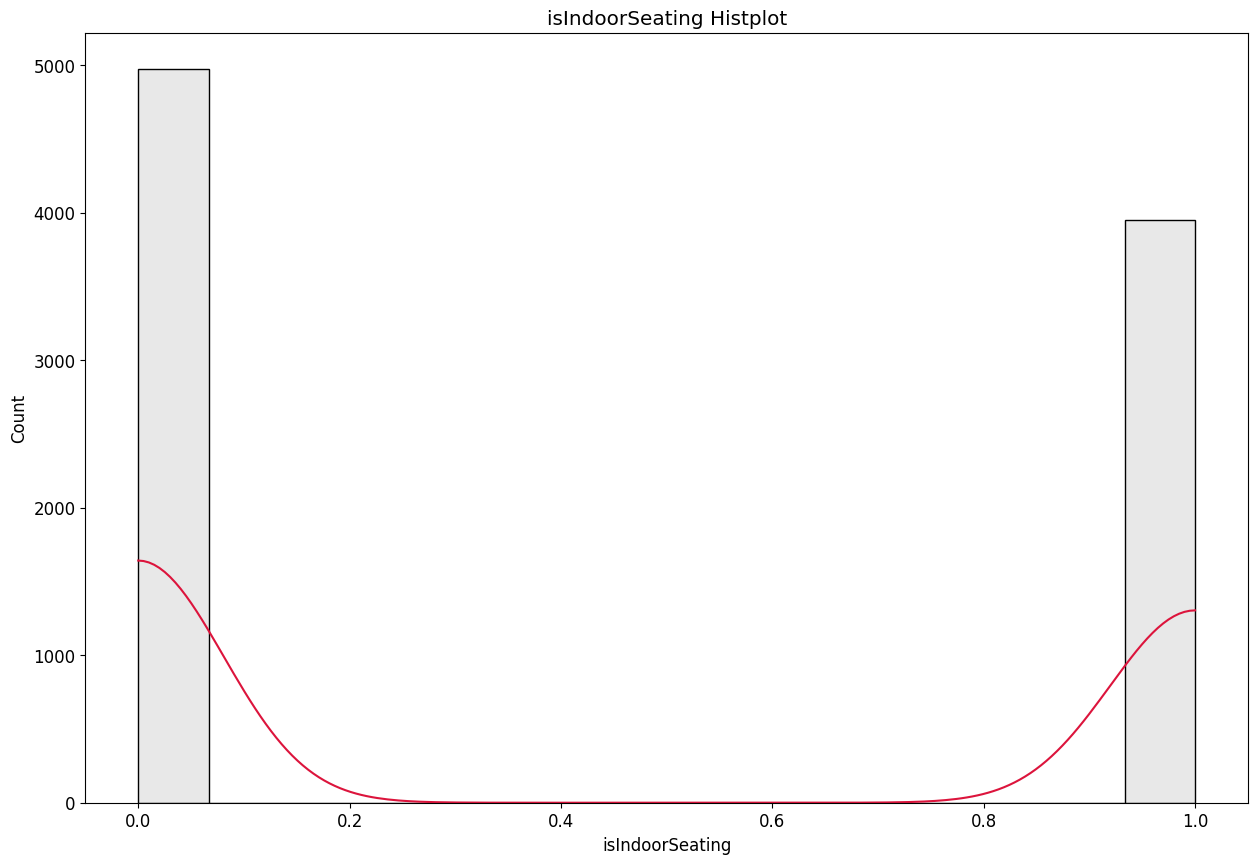

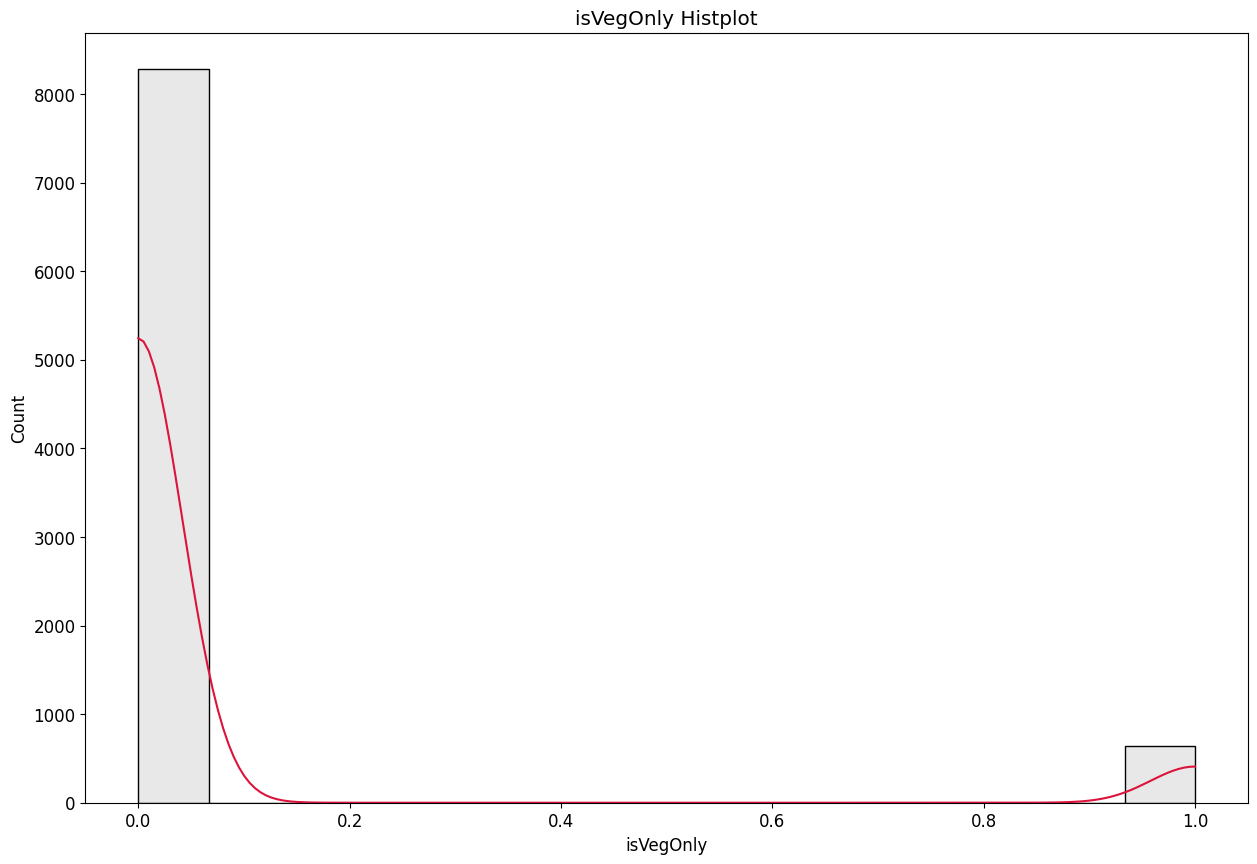

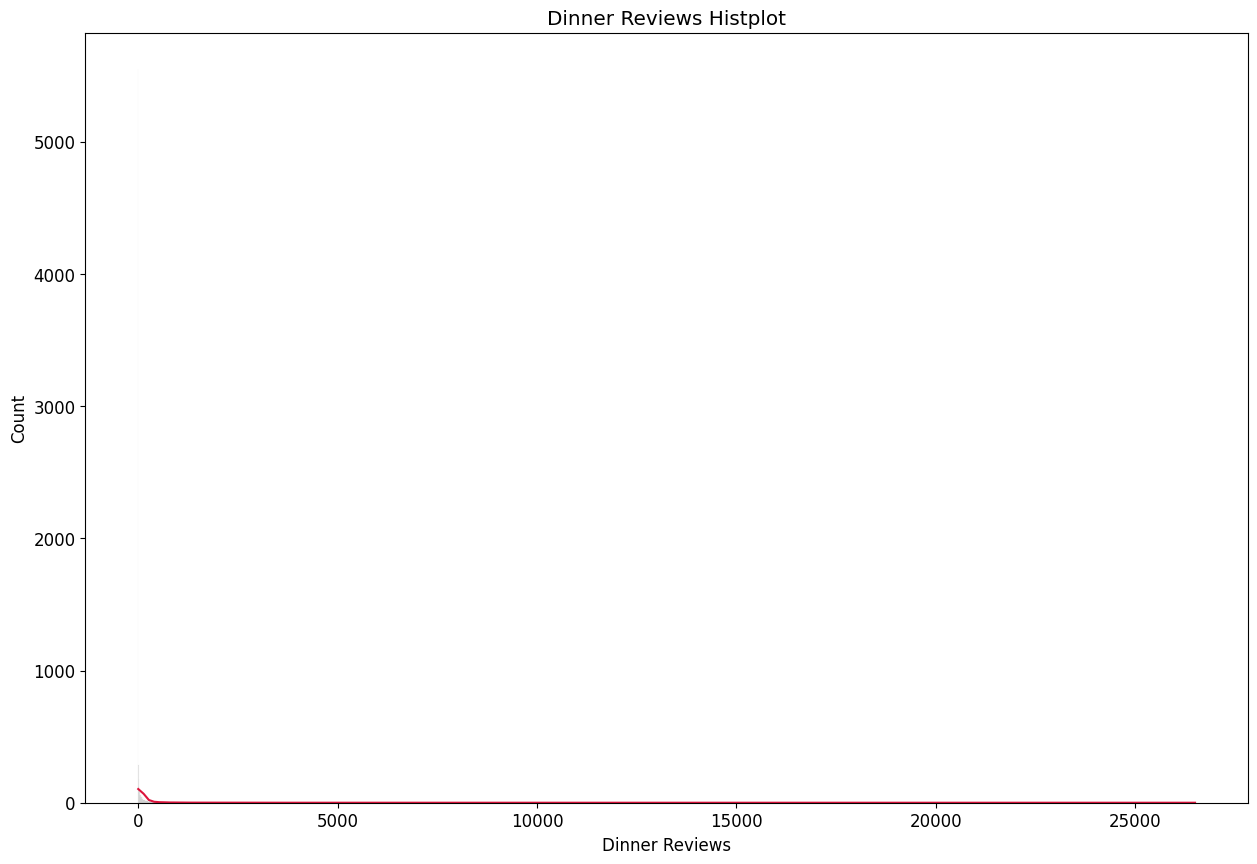

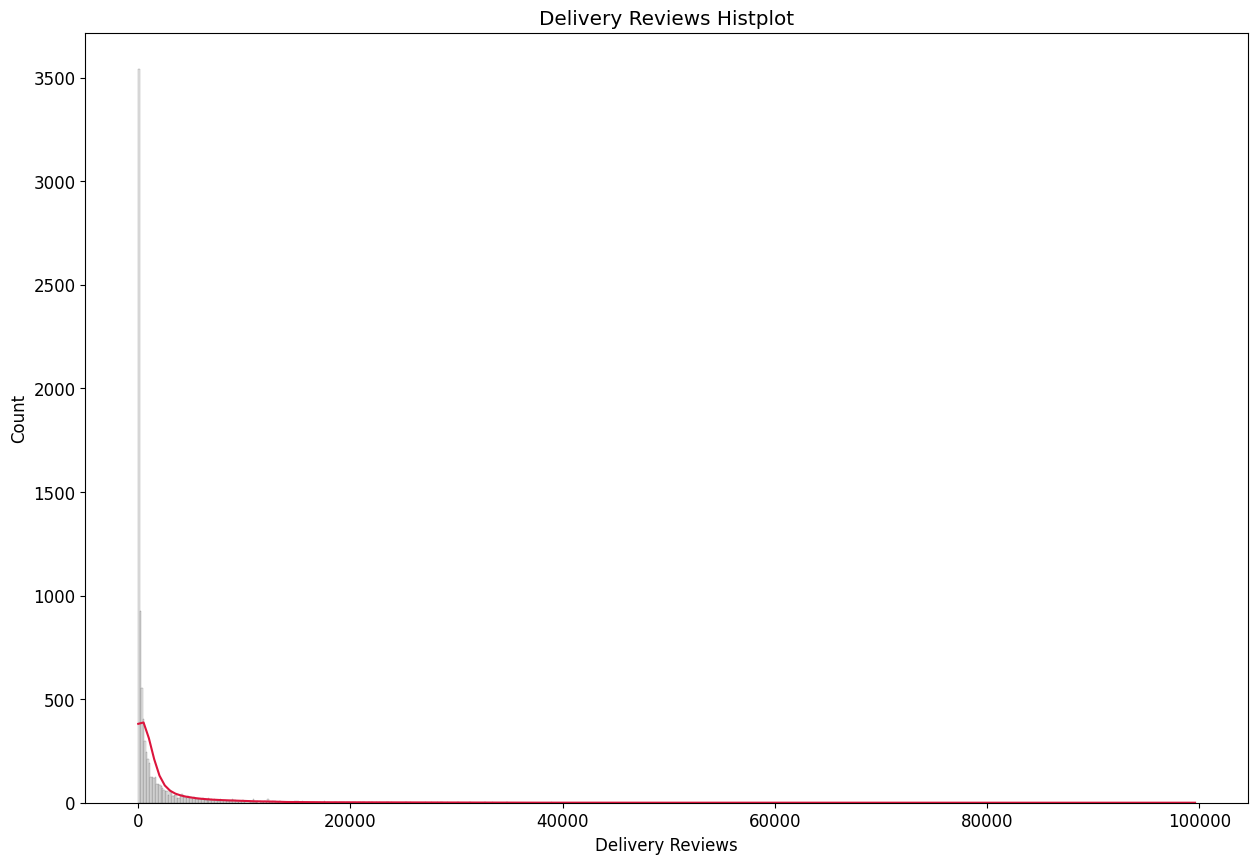

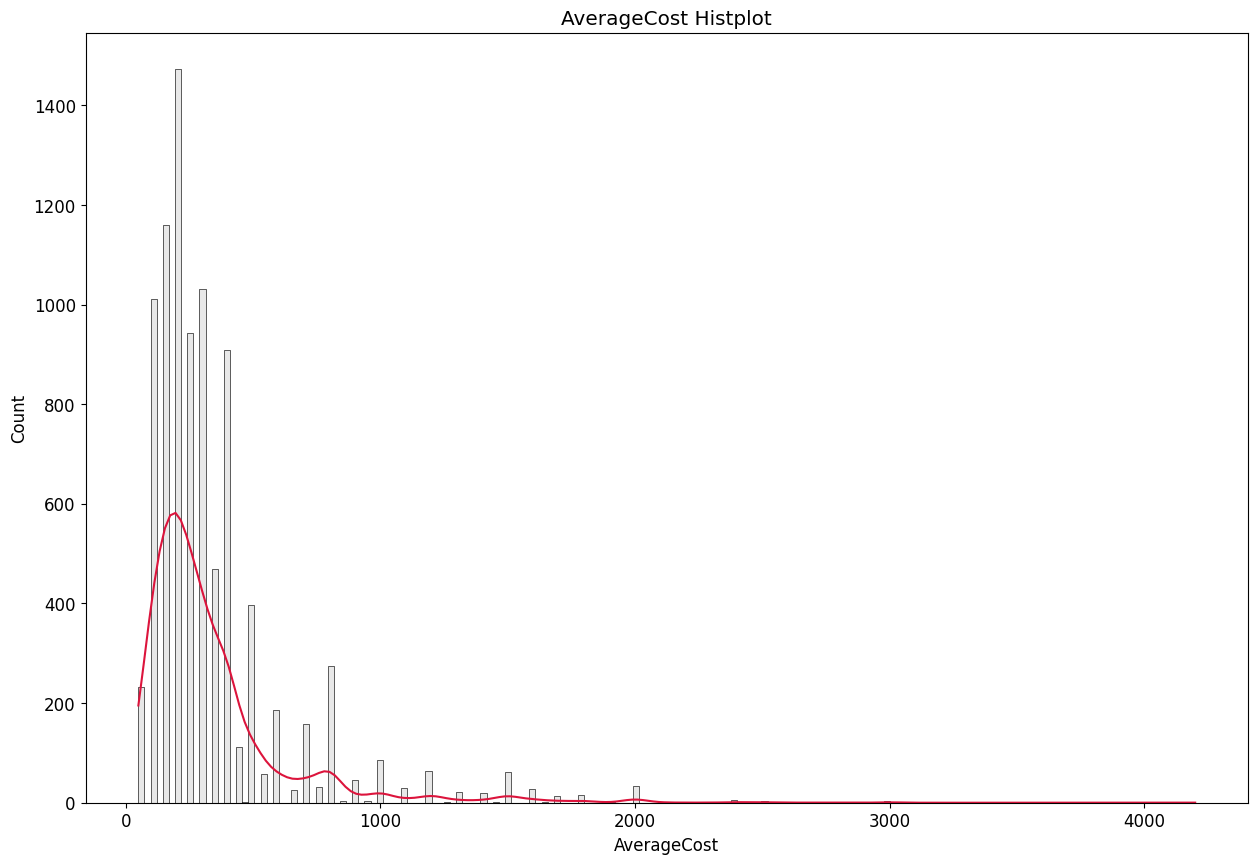

In [15]:
for i in df.select_dtypes(include=['int64']):
    ax= sns.histplot(df.select_dtypes(include=['int64'])[i],
             kde=True, color='lightgray')
    ax.lines[0].set_color('crimson')
    plt.title(i+" "+'Histplot')
    plt.show();

## **Inferences**

1) More restaurants in Bangalore are doing the home delivery than the takeaways.

2) Restaurants are focussing more on delivering the convenience to the customers as opposed to having the people walk up to the restaurants to pick up their order.

3) Veg Only restaurants are very less in Bengaluru, India,
Dine-in places are less which relates with our first point that states there are more restaurants that like to deliver.

4) Dinner Reviews are less than Delivery reviews. The dinner reviews are bound to be less just by the comparison of the deliveries being done in the area.

5) Average Cost is within the Rs 300-400 range.

In [16]:
df1 = df.copy().sort_values(by='AverageCost',ascending= False).drop_duplicates('Name').head(10)


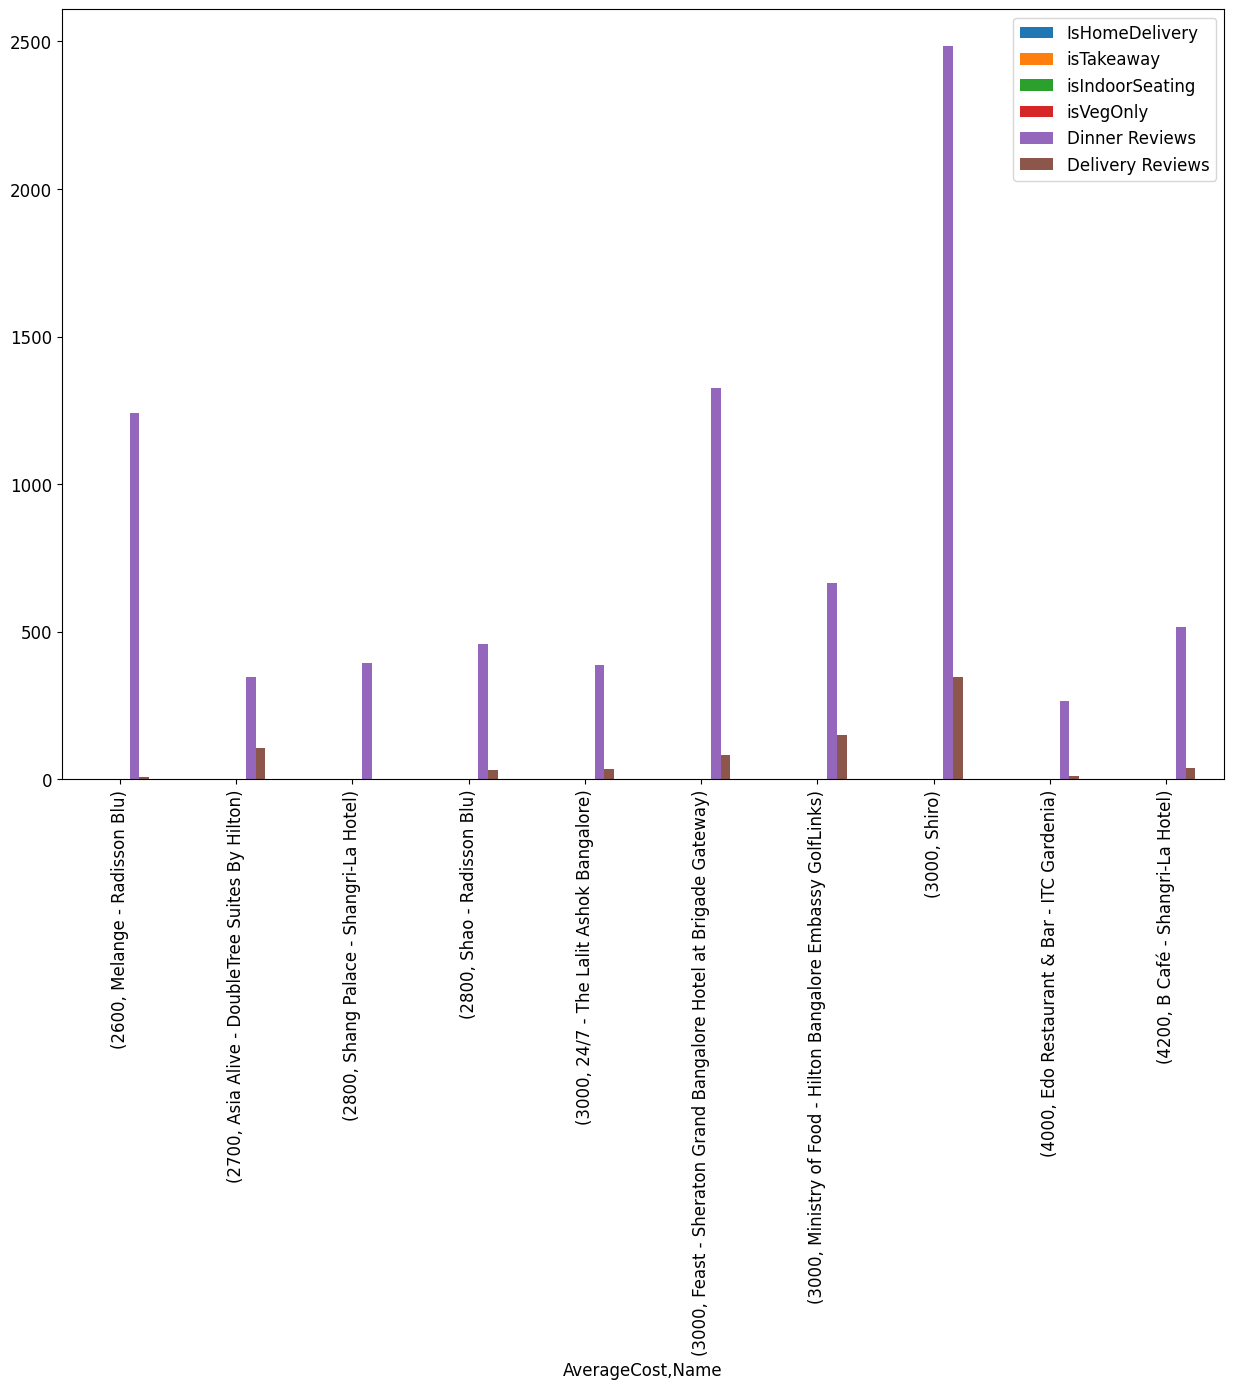

In [17]:
df1.groupby(['AverageCost','Name']).mean().plot.bar();

In [18]:
df1.groupby(['AverageCost', 'Name']).sum()

IsHomeDelivery  \
AverageCost Name                                                                 
2600        Melange - Radisson Blu                                           1   
2700        Asia Alive - DoubleTree Suites By Hilton                         1   
2800        Shang Palace - Shangri-La Hotel                                  1   
            Shao - Radisson Blu                                              1   
3000        24/7 - The Lalit Ashok Bangalore                                 1   
            Feast - Sheraton Grand Bangalore Hotel at Briga...               1   
            Ministry of Food - Hilton Bangalore Embassy Gol...               1   
            Shiro                                                            1   
4000        Edo Restaurant & Bar - ITC Gardenia                              1   
4200        B Café - Shangri-La Hotel                                        1   

                                                                isTakeaway  \
AverageCost Name                                                             
2600        Melange - Radisson Blu                                       0   
2700        Asia Alive - DoubleTree Suites By Hilton                     0   
2800        Shang Palace - Shangri-La Hotel                              0   
            Shao - Radisson Blu                                          1   
3000        24/7 - The Lalit Ashok Bangalore                             0   
            Feast - Sheraton Grand Bangalore Hotel at Briga...           1   
            Ministry of Food - Hilton Bangalore Embassy Gol...           1   
            Shiro                                                        0   
4000        Edo Restaurant & Bar - ITC Gardenia                          0   
4200        B Café - Shangri-La Hotel                                    0   

                                                                isIndoorSeating  \
AverageCost Name                                                                  
2600        Melange - Radisson Blu                                            1   
2700        Asia Alive - DoubleTree Suites By Hilton                          1   
2800        Shang Palace - Shangri-La Hotel                                   1   
            Shao - Radisson Blu                                               1   
3000        24/7 - The Lalit Ashok Bangalore                                  1   
            Feast - Sheraton Grand Bangalore Hotel at Briga...                1   
            Ministry of Food - Hilton Bangalore Embassy Gol...                1   
            Shiro                                                             1   
4000        Edo Restaurant & Bar - ITC Gardenia                               1   
4200        B Café - Shangri-La Hotel                                         1   

                                                                isVegOnly  \
AverageCost Name                                                            
2600        Melange - Radisson Blu                                      0   
2700        Asia Alive - DoubleTree Suites By Hilton                    0   
2800        Shang Palace - Shangri-La Hotel                             0   
            Shao - Radisson Blu                                         0   
3000        24/7 - The Lalit Ashok Bangalore                            0   
            Feast - Sheraton Grand Bangalore Hotel at Briga...          0   
            Ministry of Food - Hilton Bangalore Embassy Gol...          0   
            Shiro                                                       0   
4000        Edo Restaurant & Bar - ITC Gardenia                         0   
4200        B Café - Shangri-La Hotel                                   0   

                                                                Dinner Reviews  \
AverageCost Name                                                                 
2600        Melange - Radisson Blu                      

### **Restaurant wise average cost in Banglore**

In [20]:
import plotly.express as px

fig = px.bar(df1, x='Name', template='simple_white', y='AverageCost', color='Name', text_auto=True)

fig.update_xaxes(categoryorder='total descending')

fig.update_layout(xaxis_tickangle=90)

fig.show()


## **Inferences**

**The top 5 Restaurants are:**

1) B Cafe

2) Edo Restaurant and Bar

3) Feast

4) Shiro

5) Ministry of Food

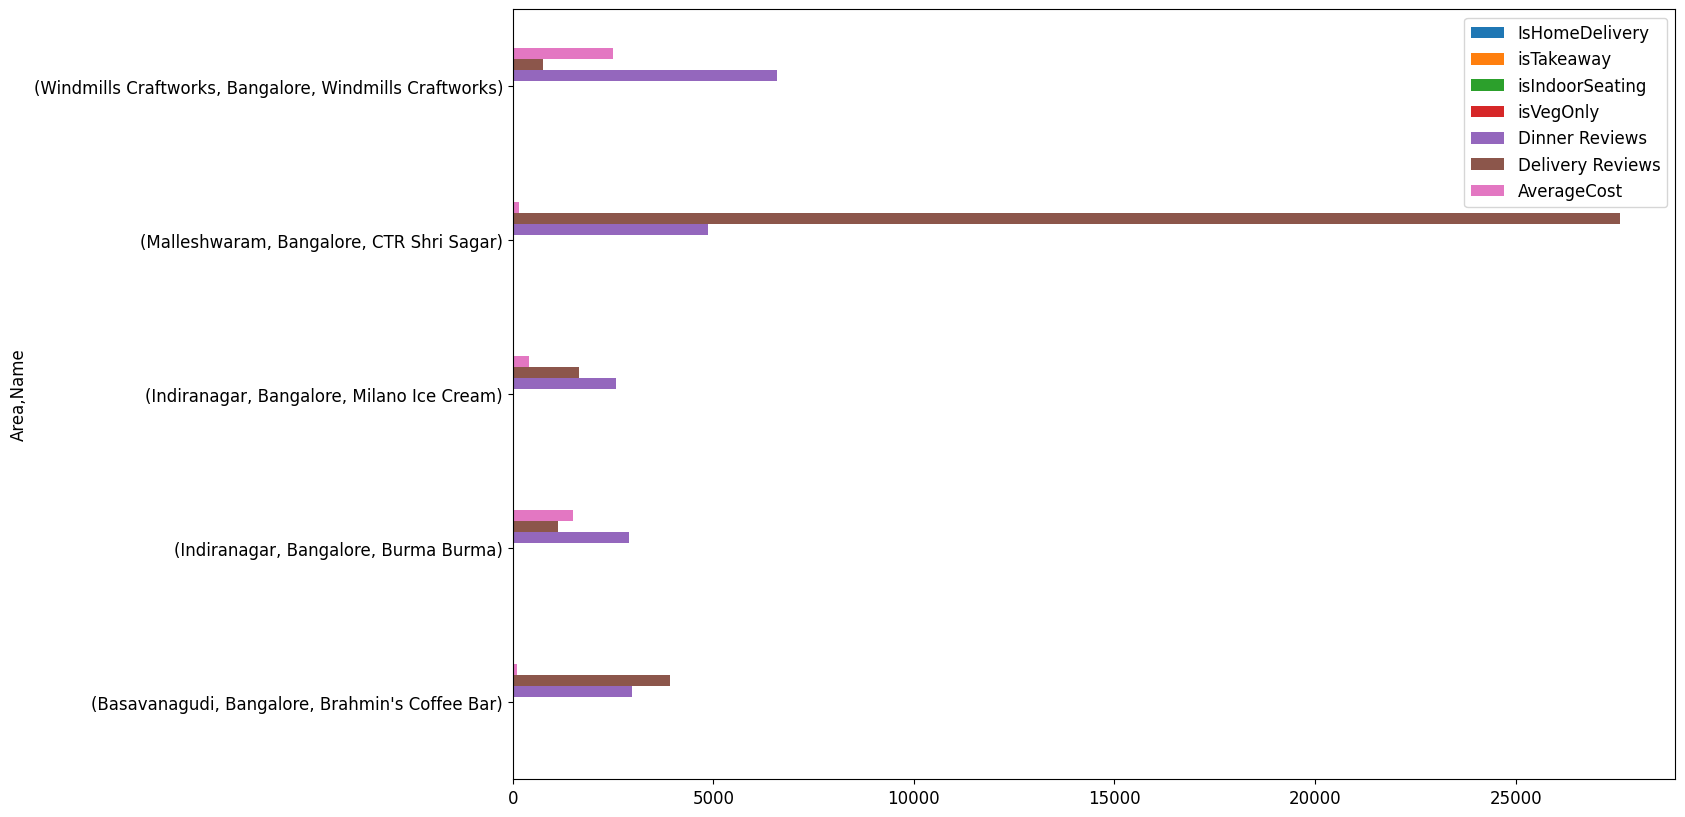

In [21]:
df2 = df.copy().sort_values(by='Dinner Ratings',ascending= False).drop_duplicates('Name').head(5)
df2.groupby(['Area','Name']).sum().plot.barh();

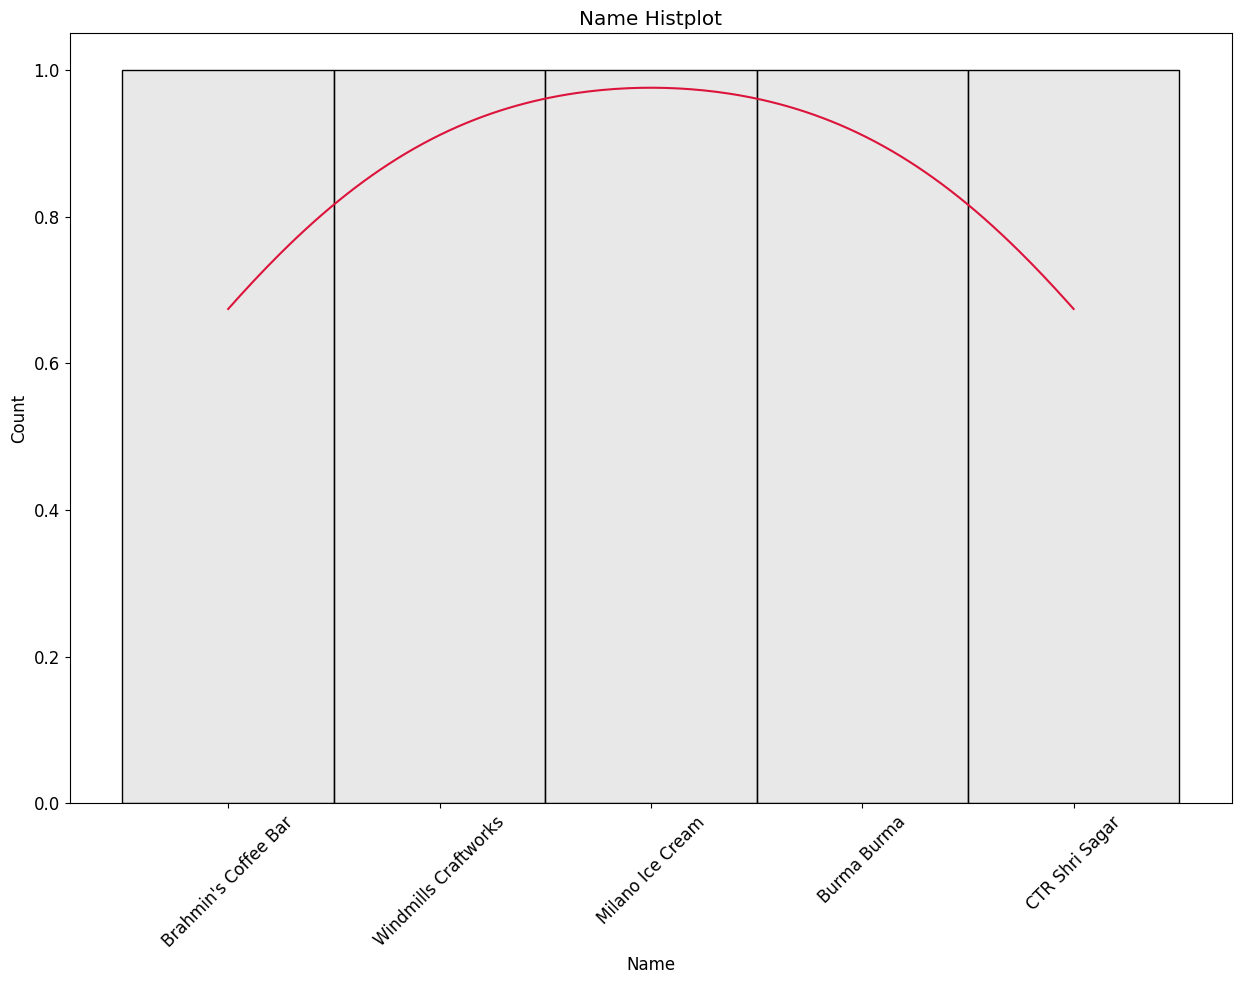

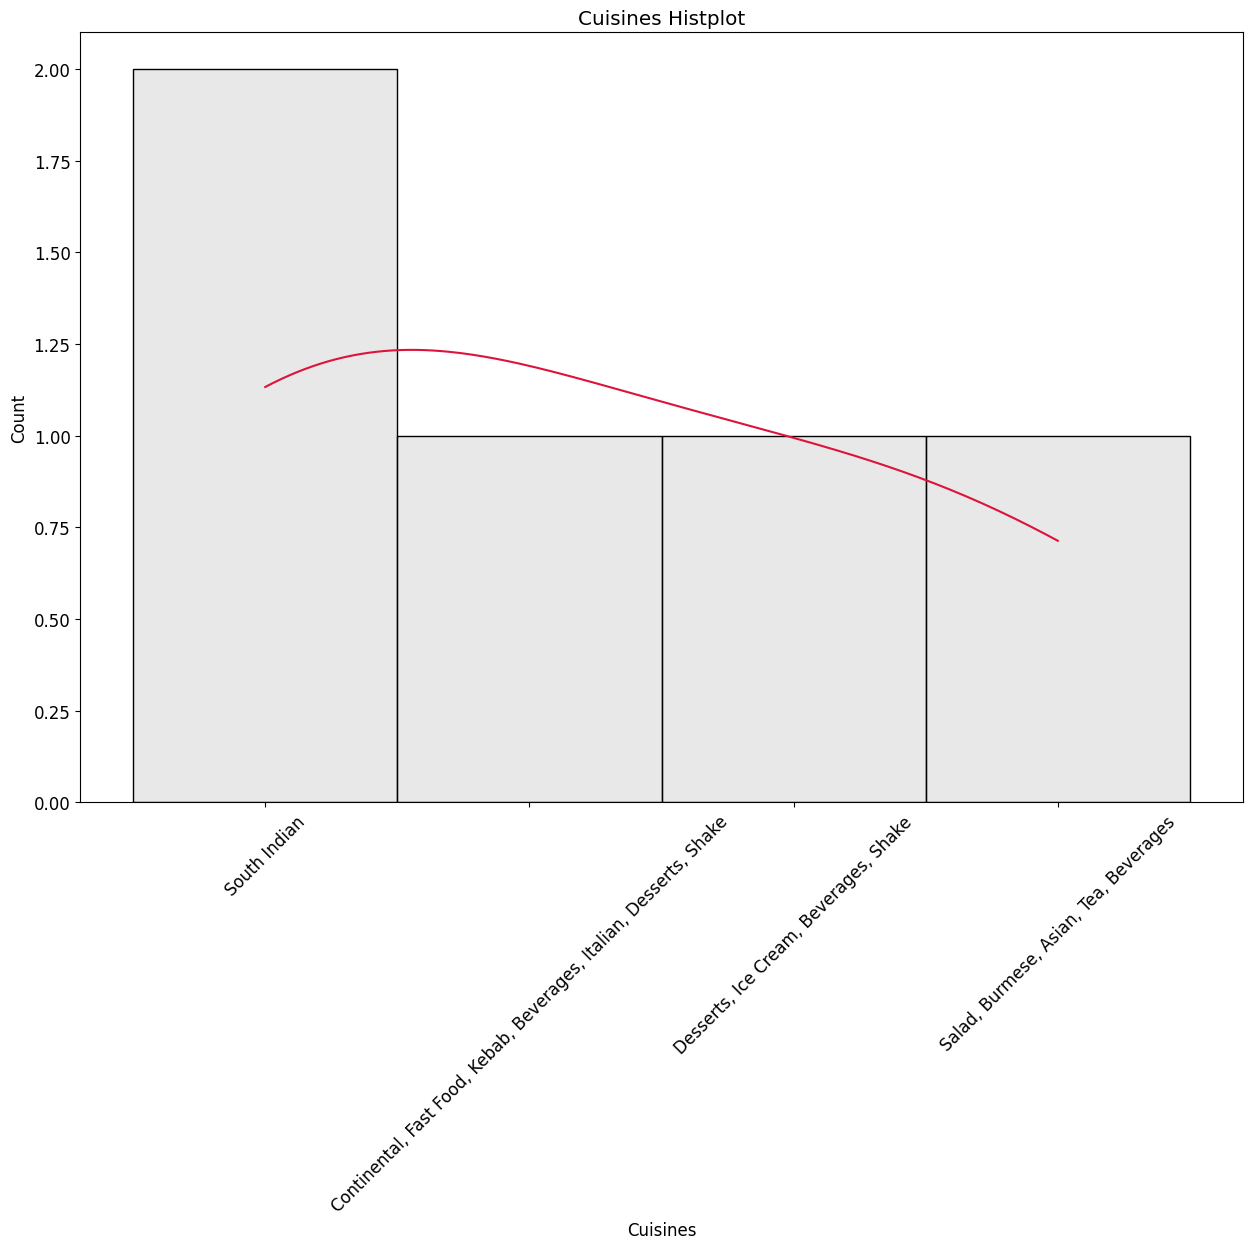

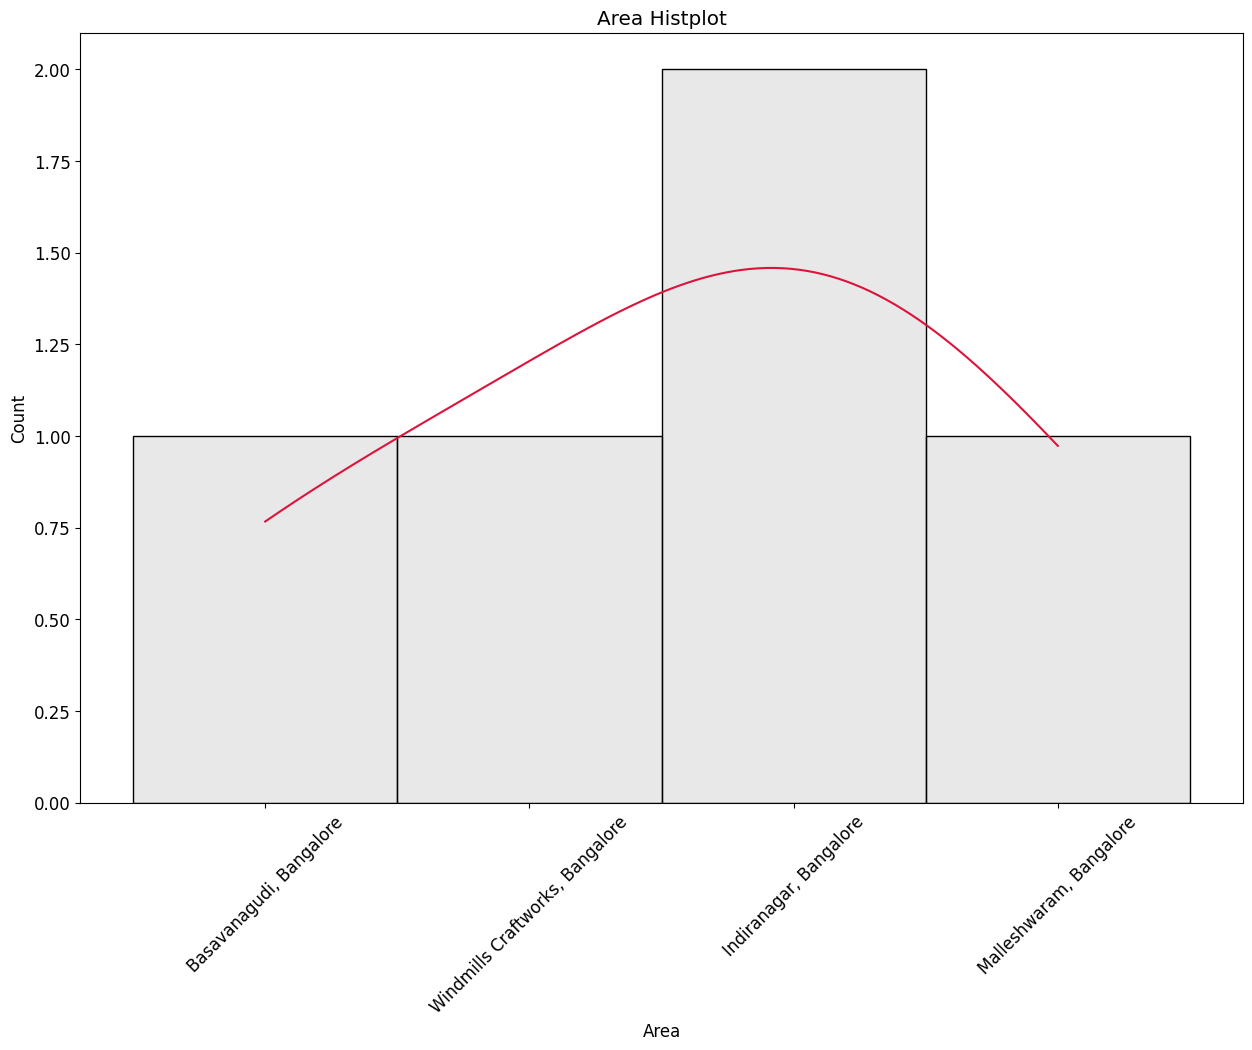

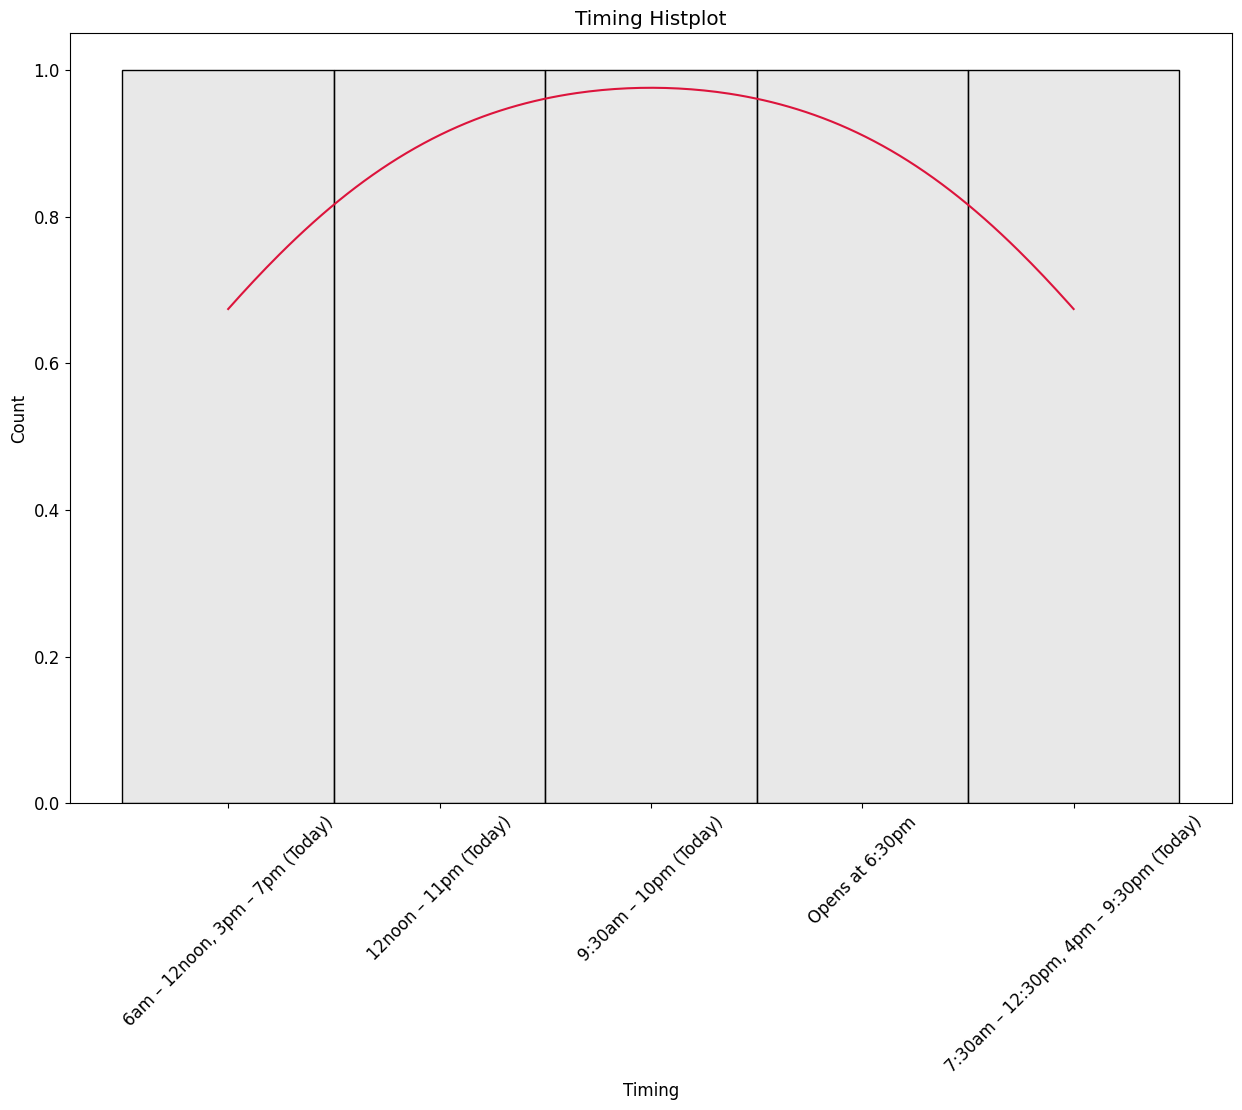

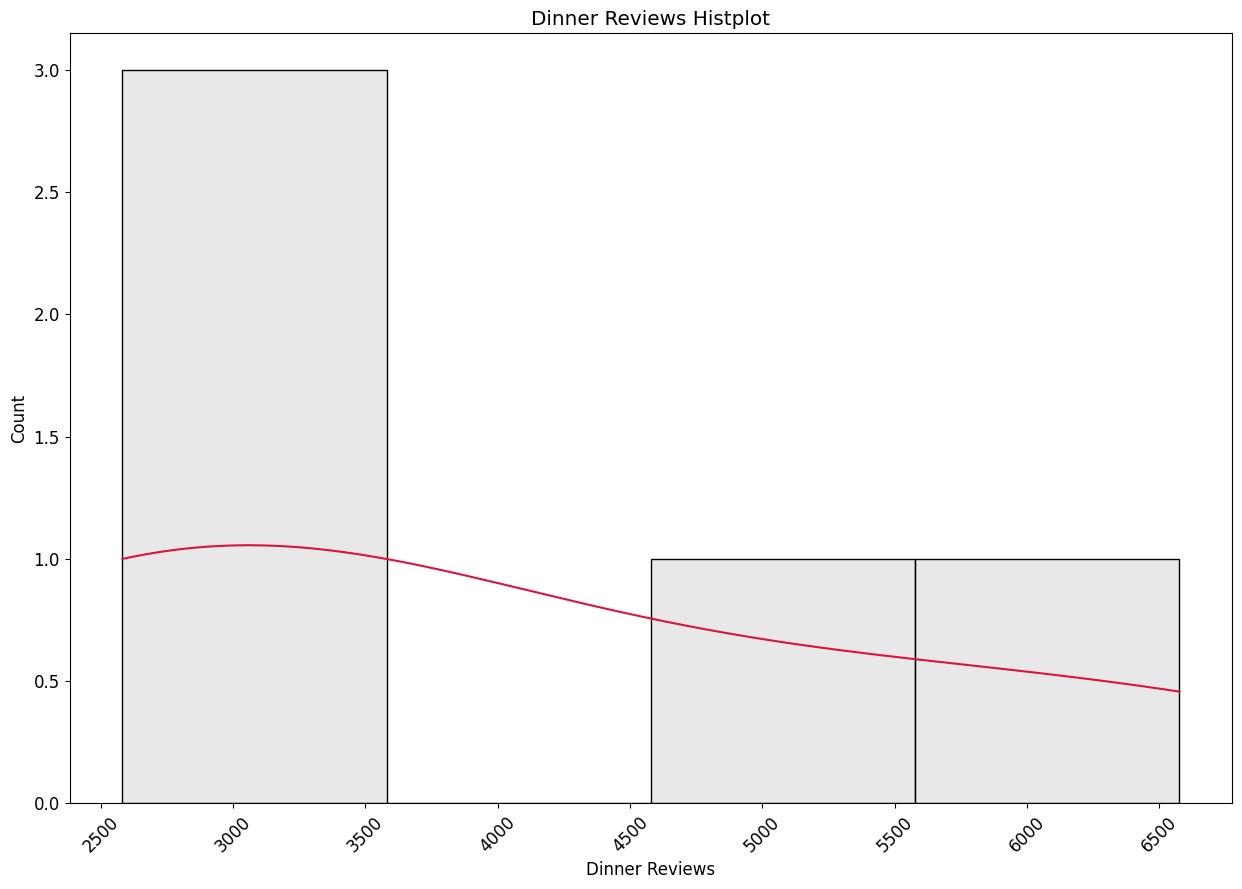

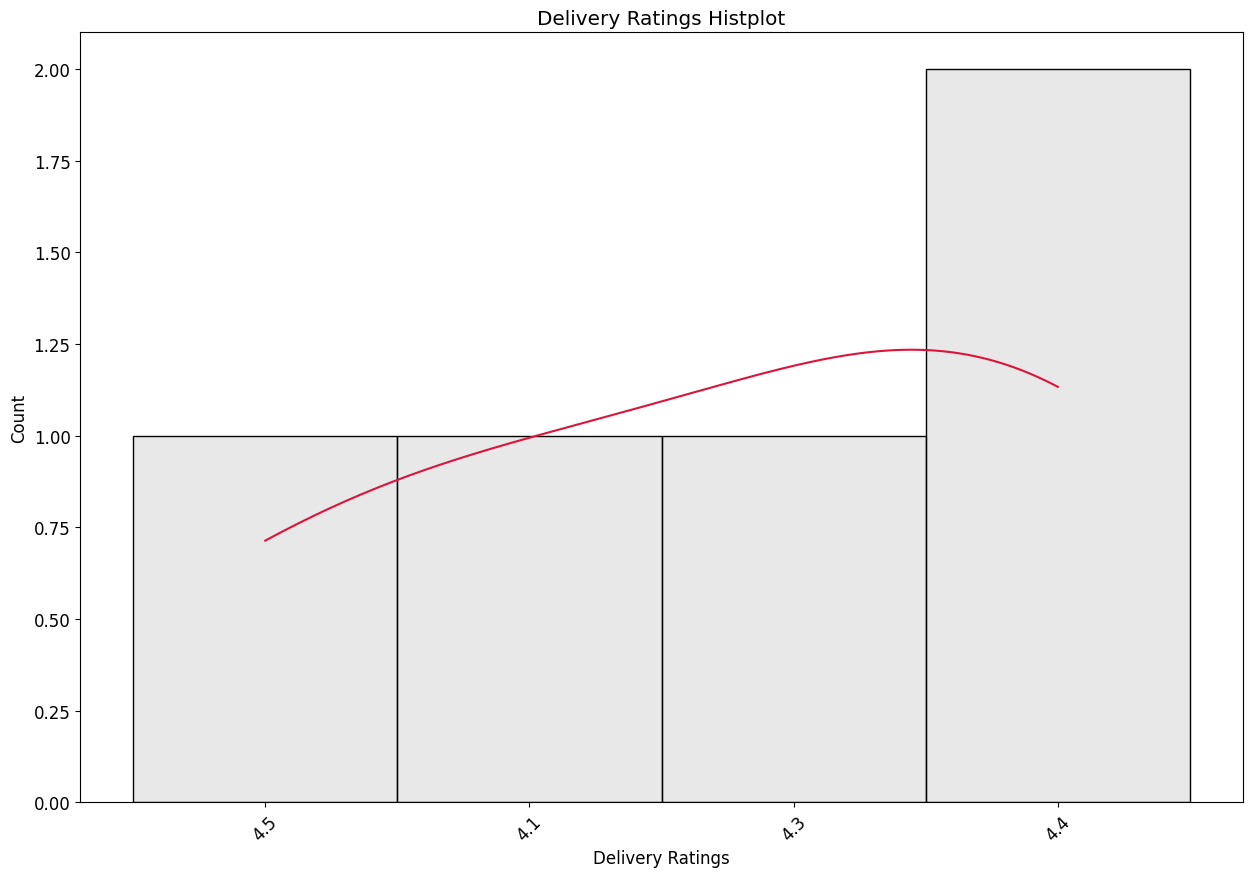

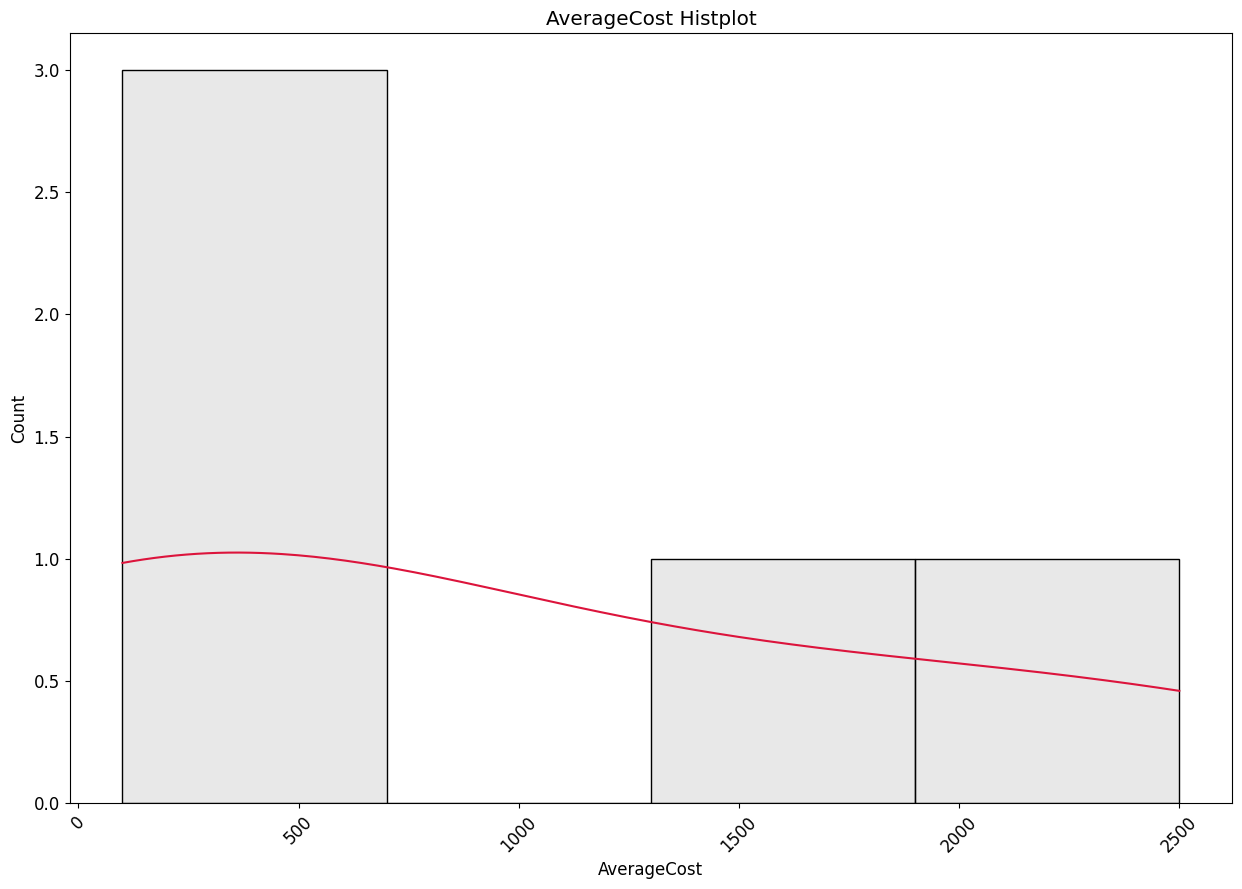

In [22]:
for i in df2[['Name', 'Cuisines', 'Area', 'Timing', 'Dinner Reviews',
       'Delivery Ratings', 'AverageCost']]:

    ax= sns.histplot(df2[['Name', 'Cuisines', 'Area', 'Timing', 'Dinner Reviews',
       'Delivery Ratings', 'PopularDishes', 'AverageCost']][i],
             kde=True, color='lightgray')
    ax.lines[0].set_color('crimson')
    plt.title(i+" "+'Histplot')
    plt.xticks(rotation = 45)
    plt.show();

### **Converting Ratings to float datatype**

In [23]:
df['Dinner Ratings'] = df['Dinner Ratings'].str.replace('-', '0').astype(np.float64)
df['Delivery Ratings'] = df['Delivery Ratings'].str.replace('-', '0').astype(np.float64)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              8923 non-null   object 
 1   Cuisines          8923 non-null   object 
 2   Area              8923 non-null   object 
 3   Timing            5820 non-null   object 
 4   IsHomeDelivery    8923 non-null   int64  
 5   isTakeaway        8923 non-null   int64  
 6   isIndoorSeating   8923 non-null   int64  
 7   isVegOnly         8923 non-null   int64  
 8   Dinner Ratings    8923 non-null   float64
 9   Dinner Reviews    8923 non-null   int64  
 10  Delivery Ratings  8923 non-null   float64
 11  Delivery Reviews  8923 non-null   int64  
 12  KnownFor          258 non-null    object 
 13  PopularDishes     1535 non-null   object 
 14  PeopleKnownFor    3484 non-null   object 
 15  AverageCost       8923 non-null   int64  
dtypes: float64(2), int64(7), object(7)
memory 

### **Restaurants famous in different Localities**

In [25]:
df.groupby(['Area','Name']).sum().head(15)

IsHomeDelivery  \
Area                                               Name                                    
1 MG Road Mall, MG Road, Bangalore                 Bakery By Foodhall                  1   
                                                   Fruitify                            1   
                                                   ROYCE' Chocolate                    1   
                                                   Smoor                               1   
                                                   Yauatcha                            1   
153 Biere Street, Bangalore                        SLV Corner Restaurant               1   
5th Avenue, Brigade Road, Bangalore                Thai House                          1   
Abhimaani Vasathi, Bangalore                       Coastal Spice                       1   
Aloft Bengaluru Cessna Business Park, Kadubeesa... Nandhini Deluxe                     1   
Aloft Hotel, Whitefield, Bangalore                 Dot.yum - Aloft Hotel               1   
                                                   Estia - Aloft Hotel                 1   
Ascendas Park Square, Whitefield, Bangalore        Amoeba Sports Bar                   1   
                                                   Barbeque Nation                     1   
                                                   California Burrito                  1   
                                                   Deccan Paradise                     1   

                                                                          isTakeaway  \
Area                                               Name                                
1 MG Road Mall, MG Road, Bangalore                 Bakery By Foodhall              1   
                                                   Fruitify                        1   
                                                   ROYCE' Chocolate                1   
                                                   Smoor                           1   
                                                   Yauatcha                        1   
153 Biere Street, Bangalore                        SLV Corner Restaurant           1   
5th Avenue, Brigade Road, Bangalore                Thai House                      1   
Abhimaani Vasathi, Bangalore                       Coastal Spice                   1   
Aloft Bengaluru Cessna Business Park, Kadubeesa... Nandhini Deluxe                 1   
Aloft Hotel, Whitefield, Bangalore                 Dot.yum - Aloft Hotel           1   
                                                   Estia - Aloft Hotel             0   
Ascendas Park Square, Whitefield, Bangalore        Amoeba Sports Bar               1   
                                                   Barbeque Nation                 1   
                                                   California Burrito              1   
                                                   Deccan Paradise                 1   

                                                                          isIndoorSeating  \
Area                                               Name                                     
1 MG Road Mall, MG Road, Bangalore                 Bakery By Foodhall                   0   
                                                   Fruitify                             1   
                                                   ROYCE' Chocolate                     0   
                                                   Smoor                                0   
                                                   Yauatcha                             1   
153 Biere Street, Bangalore                        SLV Corner Restaurant                1   
5th Avenue, Brigade Road, Bangalore                Thai House                           1   
Abhimaani Vasathi, Bangalore                       Coastal Spice                        1   
Aloft Bengaluru Cessna Business Park, Kadubeesa... Nandhini Deluxe                

In [26]:
for i in df[['Dinner Ratings','Delivery Ratings', 'AverageCost']]:
    fig = px.histogram(df[['Dinner Ratings','Delivery Ratings', 'AverageCost']],
                       x=i,
                       template='simple_white')
    fig.show()

### **Cuisines famous in different localities**

In [27]:
df.groupby(['Area','Cuisines']).sum()

IsHomeDelivery  \
Area                               Cuisines                                                             
1 MG Road Mall, MG Road, Bangalore Bakery, Desserts                                                 1   
                                   Bakery, Desserts, Panini, Mexican, American                      1   
                                   Chinese, Asian, Seafood                                          1   
                                   Desserts                                                         1   
                                   Sandwich, Fast Food, Ice Cream, Desserts, Bever...               1   
...                                                                                               ...   
Yeshwantpur, Bangalore             South Indian, North Indian, Kebab, Biryani                       1   
                                   South Indian, Street Food, Chinese                               1   
                                   South Indian, Tea                                                1   
                                   Street Food                                                      3   
                                   Street Food, Arabian, North Indian, Mughlai, Se...               1   

                                                                                       isTakeaway  \
Area                               Cuisines                                                         
1 MG Road Mall, MG Road, Bangalore Bakery, Desserts                                             1   
                                   Bakery, Desserts, Panini, Mexican, American                  1   
                                   Chinese, Asian, Seafood                                      1   
                                   Desserts                                                     1   
                                   Sandwich, Fast Food, Ice Cream, Desserts, Bever...           1   
...                                                                                           ...   
Yeshwantpur, Bangalore             South Indian, North Indian, Kebab, Biryani                   1   
                                   South Indian, Street Food, Chinese                           1   
                                   South Indian, Tea                                            1   
                                   Street Food                                                  2   
                                   Street Food, Arabian, North Indian, Mughlai, Se...           1   

                                                                                       isIndoorSeating  \
Area                               Cuisines                                                              
1 MG Road Mall, MG Road, Bangalore Bakery, Desserts                                                  0   
                                   Bakery, Desserts, Panini, Mexican, American                       0   
                                   Chinese, Asian, Seafood                                           1   
                                   Desserts                                                          0   
                                   Sandwich, Fast Food, Ice Cream, Desserts, Bever...                1   
...                                                                                                ...   
Yeshwantpur, Bangalore             South Indian, North Indian, Kebab, Biryani                        1   
                                   South Indian, Street Food, Chinese                                1   
                                   South Indian, Tea                                                 0   
                                   Street Food                                                       0   
                                   Street Food, Arabian, North Indian, Mughlai, Se...                0   

                            

In [28]:
fig = px.bar(df.groupby(['Cuisines']).sum().head(10),
             x='Delivery Ratings',
             template='simple_white',
             title ='Ratings Of Various Cuisines')
fig.update_yaxes(categoryorder='total ascending')
fig.show();

In [29]:
df.groupby(['Cuisines']).mean().sort_values(by='Delivery Ratings', ascending=False)

,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost
Cuisines,,,,,,,,,
"Beverages, Bubble Tea",1.0,0.0,0.0,0.0,0.0,0.0,4.6,195.0,250.0
"Bakery, Fast Food, Desserts, Beverages",1.0,1.0,0.0,0.0,0.0,0.0,4.6,674.0,350.0
"Street Food, Fast Food, Beverages, Coffee",1.0,1.0,1.0,0.0,4.4,370.0,4.6,244.0,400.0
Maharashtrian,1.0,1.0,1.0,1.0,4.2,195.0,4.5,834.0,250.0
Korean,1.0,1.0,1.0,0.0,4.1,251.0,4.5,578.0,800.0
...,...,...,...,...,...,...,...,...,...
"Bengali, Street Food",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
"Continental, Asian, Bar Food, Desserts, Beverages",1.0,1.0,1.0,0.0,4.2,1042.0,0.0,7.0,1700.0
"Mughlai, North Indian, Chinese, Biryani",1.0,1.0,1.0,0.0,3.0,19.0,0.0,0.0,1200.0


In [30]:
df[df.isIndoorSeating.eq(1)].sort_values(by='Dinner Ratings', ascending=False).head()

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
231,Milano Ice Cream,"Desserts, Ice Cream, Beverages, Shake","Indiranagar, Bangalore",9:30am – 10pm (Today),1,1,1,0,4.9,2582,4.3,1642,Varieties of Gelato Ice Creams.,"Baileys Ice Cream, Extra Dark Chocolate, Vanil...","Bank for the Buck, Totally Worth it, Cozy Ambi...",400
5529,CTR Shri Sagar,South Indian,"Malleshwaram, Bangalore","7:30am – 12:30pm, 4pm – 9:30pm (Today)",1,1,1,1,4.9,4869,4.4,27600,being one of the oldest South Indian breakfast...,"Goli Bajji, Rave Idli, Benne Dosa, Coriander C...","Breakfast Joint, Courteous Waiters, Bang for t...",150
22,Burma Burma,"Salad, Burmese, Asian, Tea, Beverages","Indiranagar, Bangalore",Opens at 6:30pm,1,1,1,0,4.9,2899,4.4,1123,NaN,"Honey Caviar, Durian Ice Cream, Samosa Soup, P...","Big Menu, Soothing Ambience, Vegan Options, Qu...",1500
1062,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...","Windmills Craftworks, Bangalore",12noon – 11pm (Today),1,0,1,0,4.9,6575,4.1,759,Ambience And Live Performances in Jazz Theatre,"Breakfast Martini, Bacon Salad, Lamb Kofta, Va...","Live Jazz, Sophisticated Ambience, Live Perfor...",2500
2222,Natural Ice Cream,"Ice Cream, Beverages","Koramangala 1st Block, Bangalore",11am – 11:30pm (Today),1,1,1,1,4.8,1100,4.6,1504,NaN,"Sitafal Ice Cream, Tender Coconut Ice Cream, C...","Totally Worth it, Parking, Concept, Best Place...",300


In [31]:
#What is the best restaurant for each category (Vegetarian)
df[df.isVegOnly.eq(1)].sort_values(by='Dinner Ratings', ascending=False).head(1)

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
3530,Brahmin's Coffee Bar,South Indian,"Basavanagudi, Bangalore","6am – 12noon, 3pm – 7pm (Today)",1,1,0,1,4.9,2976,4.5,3923,NaN,"Idli Chatni, Coffee Bar, Khara Bhath, Vada Com...","Best Idli, Breakfast Joint, Inexpensive, Good ...",100


### **General Reviews**

In [32]:
reviews = df[pd.notnull(df.PeopleKnownFor)].PeopleKnownFor.values.tolist()
for i in range(1, len(reviews))[:20]:
    print(f'Review {i} - {reviews[i]} ')

Review 1 - Boneless Chicken Biryani, Ample Seating Area, Serving Size, Family Place, Relaxed Atmosphere, Delivery Person 
Review 2 - Great Recommendations, Nice Taste, Great Ambiance, Good Quantity, Excellent Food, Nice Food 
Review 3 - Value for Money, Packaging, Staff, Ambience, Food 
Review 4 - Elegantly Decorated, Great Recommendations, View, Location, Good Taste, Worth the Money 
Review 5 - Fresh Food with Good Quality, Worth the Money, Great Portions, Timely Service, Delicious Food 
Review 6 - Bang for the Buck, Cozy Ambiance, Nice Crowd, Low Price, Comfortable Seating, Good Atmosphere 
Review 7 - Casual Seating Area, Hygiene, Location, Friendly Staff, Spicy, Good Place 
Review 8 - Serving Size, Family Place, Decent Ambience, Good Quantity, Decent Place, Portion 
Review 9 - Good Packaging, Excellent Food, Spill Proof Packaging, Good Taste, Reasonable Price, Packing 
Review 10 - Value for Price, Customizations Available, Chirpy Crowd, Bang for the Buck, Nice Delivery, Good Portion

## **Popularity-Based Recommendation Systems**

This type of system checks the products which are in trend or are most popular among the users and directly recommends those.

In [33]:
newdf = pd.DataFrame(df[df['Delivery Ratings']>4].groupby('Name').count().reset_index()
                         [['Name','Delivery Ratings']]).sort_values('Delivery Ratings', ascending=False)

In [34]:
populardf= newdf.merge(df, on='Name').drop_duplicates('Name').rename(columns={'Delivery Ratings_x':'Num_del_ratings'})
populardf['PopularDishes'].fillna(populardf[populardf['PopularDishes'].isnull()]['Cuisines'], inplace=True)

In [35]:
popular_df = populardf.head(100)
popular_df = popular_df.sort_values('Delivery Ratings_y', ascending=False)
popular_df.head()

,Name,Num_del_ratings,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings_y,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
293,Natural Ice Cream,14,"Ice Cream, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),1,1,1,1,4.8,1145,4.6,1345,NaN,"Coffee Walnut, Sitaphal Ice Cream, Custard App...","Totally Worth it, Best Places, Concept, Awesom...",300
532,Corner House Ice Creams,11,"Desserts, Ice Cream, Beverages","Indiranagar, Bangalore",11am – 11:30pm (Today),1,1,1,0,4.8,2408,4.5,16100,NaN,"Thick Chocolate Shake, Brown Bomb, Cashew Fudg...","Totally Worth it, Big Menu, Pocket Friendly, A...",300
1005,ITC Sunfeast Baked Creations,6,"Bakery, Desserts, Sandwich","Banaswadi, Bangalore",NaN,1,0,0,0,0.0,0,4.5,219,NaN,"Bakery, Desserts, Sandwich",NaN,250
463,Apsara Ice Creams,11,"Ice Cream, Desserts","Indiranagar, Bangalore",12noon – 11:30pm (Today),1,1,1,0,4.3,265,4.5,497,NaN,"Guava Ice Cream, Belgian Chocolate, Kulfi, Ice...","Totally Worth it, Pocket Friendly, Owner, Pric...",400
606,The Belgian Waffle Co.,10,"Desserts, Ice Cream, Waffle","Marathahalli, Bangalore",NaN,1,0,0,1,0.0,0,4.4,836,NaN,"Desserts, Ice Cream, Waffle","Excellent Food Quality, Fair Prices, Contactle...",150


## **Content Based Recommendation Systems**

Content-based filtering methods are based on a description of the item and a profile of the user's preferences. These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user.

In [36]:
df['PopularDishes'].fillna(df[df['PopularDishes'].isnull()]['Cuisines'], inplace=True)

In [37]:
content = df[['Name', 'Area', 'PopularDishes', 'Cuisines',
    'AverageCost', 'Delivery Ratings','Dinner Ratings', 'IsHomeDelivery', 'isTakeaway', 'isIndoorSeating']]

In [38]:
content.loc['PopularDishes'] = content['PopularDishes']+ content['Cuisines']

In [39]:
content.drop('Cuisines', axis=1, inplace = True)
content.dropna(inplace=True)

In [40]:
content.head()

,Name,Area,PopularDishes,AverageCost,Delivery Ratings,Dinner Ratings,IsHomeDelivery,isTakeaway,isIndoorSeating
0,Sri Udupi Park,"Indiranagar, Bangalore","Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...",450.0,4.1,4.0,1.0,1.0,1.0
1,Meghana Foods,"Indiranagar, Bangalore","Authentic Hyderabadi Biryani, Paneer Biryani, ...",700.0,4.3,4.3,1.0,1.0,1.0
2,Donne Biriyani House,"Indiranagar, Bangalore",Biryani,300.0,3.5,3.9,1.0,1.0,1.0
3,Domino's Pizza,"Indiranagar, Bangalore","Barbeque Chicken Pizza, Choco Lava Cake, White...",400.0,4.4,2.4,1.0,1.0,1.0
4,KFC,"Indiranagar, Bangalore","Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings",400.0,4.0,2.8,1.0,1.0,1.0


In [41]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf = vectorizer.fit_transform(content['PopularDishes'])

In [42]:
vectorizer

TfidfVectorizer(ngram_range=(1, 2))

### **TF-IDF**

It is a measure of originality of a word by comparing the number of times a word appears in a doc, with the number of docs the word appears in.

In [43]:
tfidf

<8923x10129 sparse matrix of type '<class 'numpy.float64'>'
	with 78899 stored elements in Compressed Sparse Row format>

In [44]:
dish = 'Momos'
query_vec = vectorizer.transform([dish])
similarity = cosine_similarity(query_vec, tfidf).flatten()
indices = np.argpartition(similarity, -1)[-10:]
results = content.iloc[indices].iloc[::-1]

In [45]:
query_vec

<1x10129 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [46]:
similarity

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
indices

array([8913, 8914, 8915, 8916, 8917, 8918, 8919, 8920, 8921, 8884])

In [48]:
results

,Name,Area,PopularDishes,AverageCost,Delivery Ratings,Dinner Ratings,IsHomeDelivery,isTakeaway,isIndoorSeating
8884,Momo Monk,"Frazer Town, Bangalore",Momos,150.0,4.0,0.0,1.0,0.0,0.0
8921,Yuan Restaurant,"HBR Layout, Bangalore","Thai, Chinese",400.0,3.5,3.8,1.0,1.0,1.0
8920,Bangkok Bowl,"Kammanahalli, Bangalore","Salad, Chinese",300.0,3.7,0.0,1.0,1.0,0.0
8919,Kudla - Coraltree,"Coraltree, RT Nagar, Bangalore","Neer Dosa, Chicken Ghee Roast, Seafood, Crab, ...",1200.0,4.3,3.9,1.0,1.0,0.0
8918,New SBFC Food Funda,"Frazer Town, Bangalore",Fast Food,300.0,4.0,3.7,1.0,1.0,1.0
8917,Sendhoor Coffee,"Kammanahalli, Bangalore","South Indian, Beverages",100.0,4.2,0.0,1.0,1.0,0.0
8916,Lassi & Snacks Joint,"Domlur, Bangalore","Beverages, Fast Food, Sandwich, Desserts, Burg...",300.0,4.3,3.9,1.0,1.0,1.0
8915,Ocea Hotel,"Brigade Road, Bangalore","Seafood, Chicken Ghee Roast, Sea Food, Prawns",800.0,3.8,2.8,1.0,1.0,1.0
8914,Imli,"Indiranagar, Bangalore","Dahi Sev Puri, Dahi Samosa, Healthy Veg Food, ...",800.0,3.8,4.1,1.0,1.0,1.0
8913,Bhikaram Chandmal Bhujiawala,"Indiranagar, Bangalore","Street Food, Mithai",300.0,0.0,2.7,1.0,1.0,1.0


## **Recommendation**

In [49]:
def recommend(dish):
    query_vec = vectorizer.transform([dish])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -1)[-3:]
    results = content.iloc[indices].iloc[::-1]
    return results

In [50]:
recommend('chinese')

,Name,Area,PopularDishes,AverageCost,Delivery Ratings,Dinner Ratings,IsHomeDelivery,isTakeaway,isIndoorSeating
8764,The Wok,"Whitefield, Bangalore",Chinese,350.0,0.0,0.0,1.0,1.0,0.0
8921,Yuan Restaurant,"HBR Layout, Bangalore","Thai, Chinese",400.0,3.5,3.8,1.0,1.0,1.0
8920,Bangkok Bowl,"Kammanahalli, Bangalore","Salad, Chinese",300.0,3.7,0.0,1.0,1.0,0.0
